In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
tweets=pd.read_csv("Elon_musk.csv",encoding='latin1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [6]:
tweets.describe().transpose()

,count,unique,top,freq
Text,1999,1997,The most entertaining outcome is the most likely,2


In [7]:
tweets[tweets.duplicated()]

,Text
324,The most entertaining outcome is the most likely
655,@westcoastbill Indeed


In [8]:
tweets[tweets['Text'] == 'The most entertaining outcome is the most likely']

,Text
9,The most entertaining outcome is the most likely
324,The most entertaining outcome is the most likely


In [9]:
tweets[tweets['Text'] == '@westcoastbill Indeed']

,Text
139,@westcoastbill Indeed
655,@westcoastbill Indeed


In [10]:
tweets.isnull().sum()

Text    0
dtype: int64

In [11]:
tweets.drop_duplicates(inplace=True)

In [12]:
tweets.shape

(1997, 1)

Applying first level cleaning

In [13]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


Removing stop words

In [14]:
#word frequency before removal of stopwords
word_freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:10] # for top 10
word_freq

the       484
to        400
a         355
is        354
of        315
spacex    239
in        219
amp       218
for       194
tesla     166
dtype: int64

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [17]:
#word frequency before removal of stopwords
word_freq= pd.Series(' '.join(tweets['Text']).split()).value_counts()[:10] # for top 10
word_freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Create a CountVectorizer with custom settings
vectorizer = CountVectorizer(min_df=2, max_df=0.85)

# Transform the text data
X = vectorizer.fit_transform(tweets["Text"])

# Create a DataFrame with term frequencies
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()})

# Calculate term frequencies as a fraction
word_freq_df['frequency'] = word_freq_df['occurrences'] / word_freq_df['occurrences'].sum()

# Display the top 11 terms
word_freq_df.nlargest(11, 'frequency')  # Used .nlargest to simplify


,term,occurrences,frequency
1340,spacex,246,0.023214
49,amp,218,0.020572
1454,tesla,167,0.015759
446,erdayastronaut,142,0.013400
1216,rt,127,0.011985
1088,ppathole,123,0.011607
534,flcnhvy,114,0.010758
1695,yes,86,0.008116
601,great,76,0.007172
1462,teslaownerssv,73,0.006889


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a TF-IDF vectorizer with custom settings
vectorizer = TfidfVectorizer(stop_words='english', max_features=900, max_df=0.6, smooth_idf=False)

# Transform the text data
doc_vec = vectorizer.fit_transform(tweets["Text"])

# Get feature names
names_features = vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF values
df = pd.DataFrame(doc_vec.toarray(), columns=names_features)
df


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,ago,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.351373,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Bi-gram

                    Bi-gram  Freq
0                 rt spacex    71
1                     we re    26
2             spacex falcon    17
3     erdayastronaut spacex    16
4               crew dragon    13
5               pretty much    12
6                   rt nasa    12
7              waemd spacex    11
8                    you re    10
9               giga berlin    10
10              first stage    10
11  teslaratiteam teslarati    10
12              nasa spacex     9
13             falcon first     9
14                next week     9
15   erdayastronaut flcnhvy     9
16                  they re     8
17            flcnhvy tesla     8
18              coming soon     8
19            spacex dragon     8


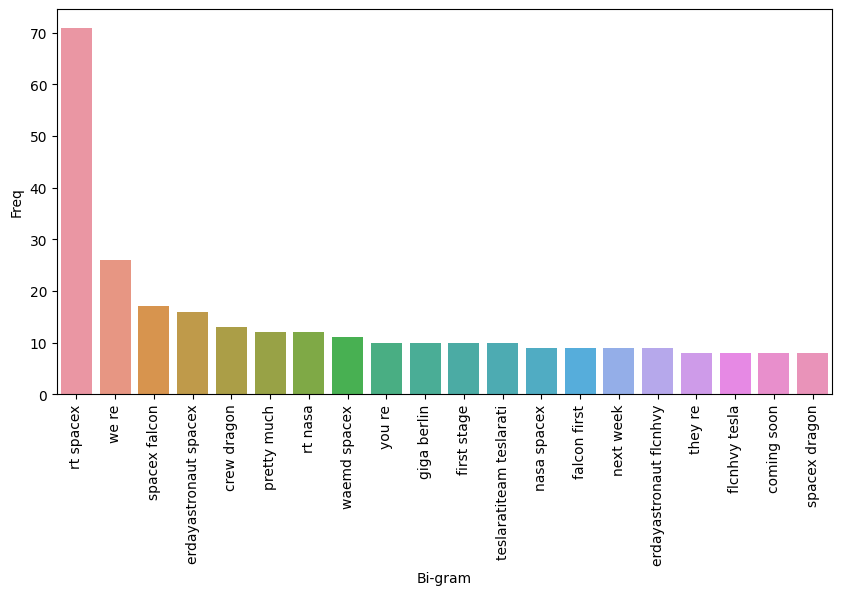

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_n_grams(corpus, n=20, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top2_words = get_top_n_grams(tweets["Text"], n=20)
top2_df = pd.DataFrame(top2_words, columns=["Bi-gram", "Freq"])
print(top2_df)

plt.figure(figsize=(10, 5))
plot = sns.barplot(x=top2_df["Bi-gram"], y=top2_df["Freq"])
plot.set_xticklabels(rotation=90, labels=top2_df["Bi-gram"])
plt.show()


                                    Trigram  Freq
0                          rt spacex falcon    17
1                        falcon first stage     9
2                       spacex falcon first     8
3              thesheetztweetz waemd spacex     8
4                         course still love     7
5            ppathole thesheetztweetz waemd     7
6               waemd spacex spacexstarlink     7
7                        first stage landed     6
8                         rt spacex liftoff     6
9     spacex spacexstarlink wanationalguard     6
10      spacex felixschlang marcushousegame     5
11                     still love droneship     5
12                         rt spacex dragon     5
13                 dragon first operational     5
14                first operational mission     5
15  casparstanley ercxspace marcushousegame     5
16   ercxspace marcushousegame felixschlang     5
17   erdayastronaut joshbickett ajtourville     4
18           joshbickett ajtourville spacex     4


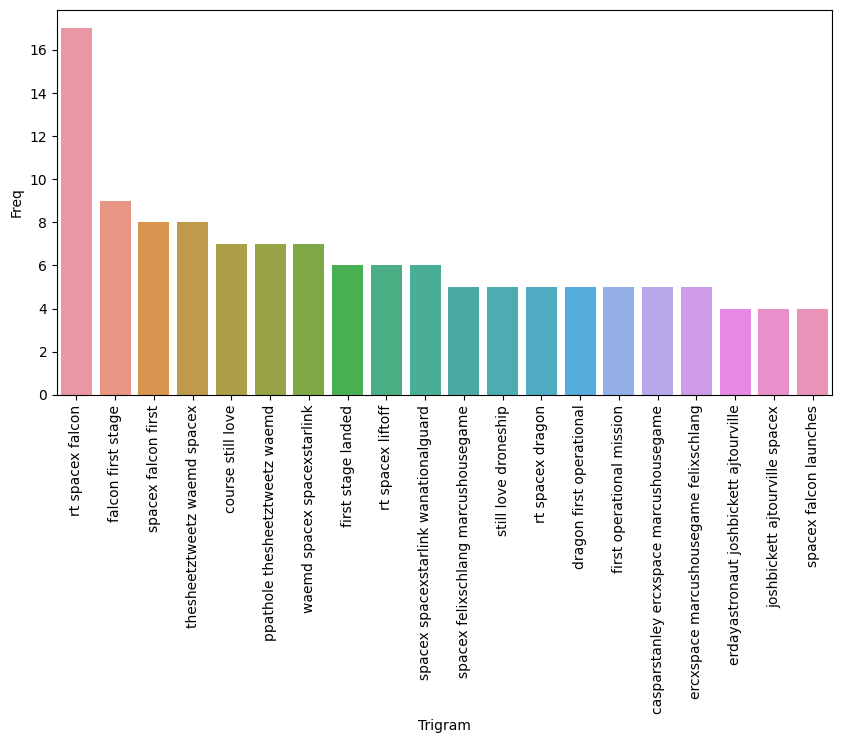

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_n_grams(corpus, n=20, ngram_range=(3, 3)):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top3_words = get_top_n_grams(tweets["Text"], n=20, ngram_range=(3, 3))
top3_df = pd.DataFrame(top3_words, columns=["Trigram", "Freq"])
print(top3_df)

plt.figure(figsize=(10, 5))
plot = sns.barplot(x=top3_df["Trigram"], y=top3_df["Freq"])
plot.set_xticklabels(rotation=90, labels=top3_df["Trigram"])
plt.show()


 Worlcloud

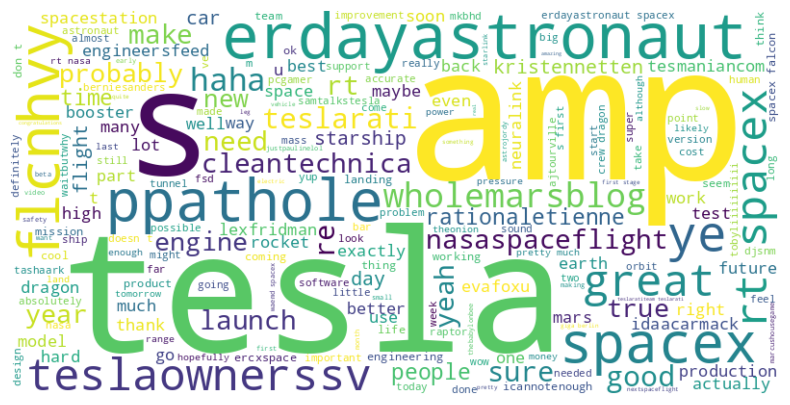

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the text data into a single string
text = ' '.join(tweets["Text"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Subjectivity and Polarity

In [28]:
from textblob import TextBlob

# Calculate subjectivity and polarity for each row in the DataFrame
def calculate_sentiment(row):
    text = row["Text"]
    sentiment = TextBlob(text).sentiment
    return sentiment.subjectivity, sentiment.polarity

# Apply the sentiment analysis function and store results in new columns
tweets[["subjectivity", "polarity"]] = tweets.apply(calculate_sentiment, axis=1, result_type="expand")

# Display the first 11 rows of the DataFrame
tweets.head(11)


,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


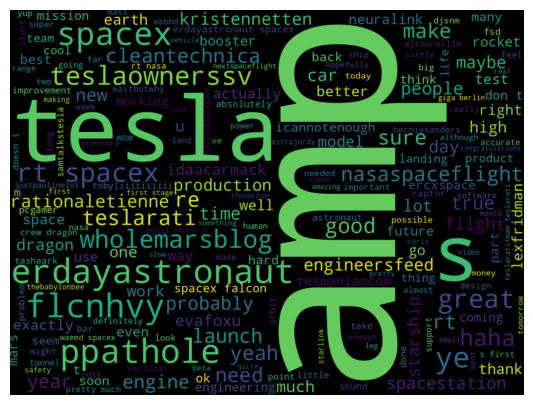

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the text data into a single string
text = ' '.join(tweets["Text"])

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=1200, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
'''
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')
'''

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [34]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Define functions for sentiment analysis
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'pos' if polarity_scores['pos'] > polarity_scores['neg'] else 'neg'

# Apply sentiment analysis and create an 'analysis' column
tweets["analysis"] = tweets["Text"].apply(fetch_sentiment_using_SIA)

# Separate positive and negative tweets
positive_tweets = tweets[tweets['analysis'] == 'pos']
negative_tweets = tweets[tweets['analysis'] == 'neg']

# Print the first 5 positive and negative tweets
print('Positive Tweets:')
print('\n'.join(positive_tweets["Text"].head(5)))

print('\nNegative Tweets:')
print('\n'.join(negative_tweets["Text"].head(5)))


Positive Tweets:
joerogan spotify great interview
teslacn congratulations tesla china amazing execution last year next even
happy new year ox
owensparks flcnhvy haha thanks
flcnhvy indeed tweets definitely represent realworld time allocation

Negative Tweets:
im alien
idaacarmack ray tracing cyberpunk hdr nextlevel tried
doge underestimated
frodo underdoge thought would fail httpstcozgxjfdzzrm
givedirectly sent


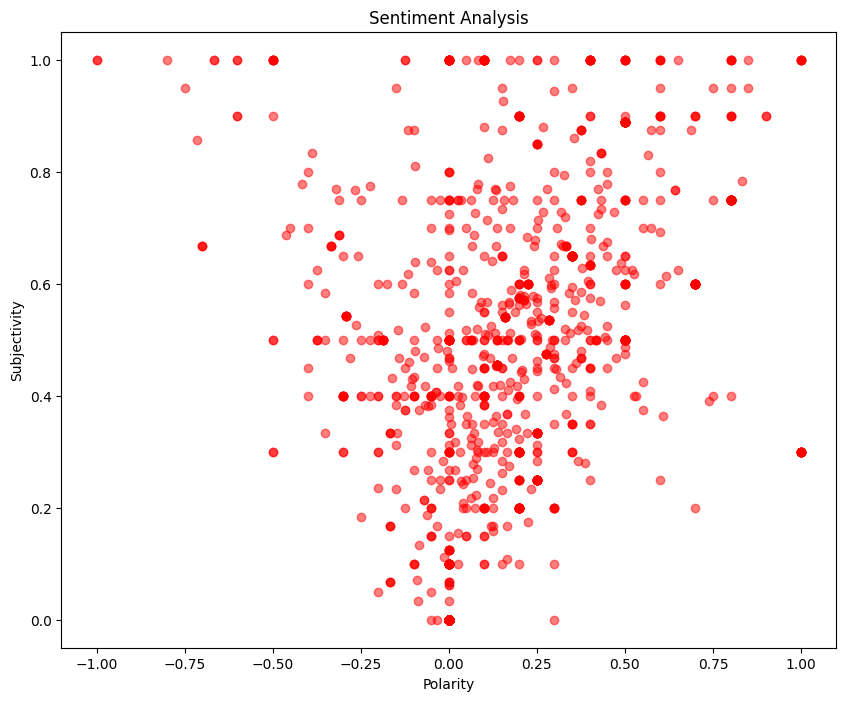

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(tweets["polarity"], tweets["subjectivity"], color="red", alpha=0.5)

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()


In [38]:
positive_percentage = (len(positive_tweets) / len(negative_tweets)) * 100
positive_percentage

82.04193254329991

Elon Musk's tweets primarily convey a positive sentiment, reflecting a favorable reception.